# 🏬 Superstore Sales Prediction Project

### 🎯 Objective:
Analyze Superstore sales data to find patterns and build a model to predict future sales.

### 📚 Steps:
1. Data Loading  
2. Data Cleaning  
3. Exploratory Data Analysis (EDA)  
4. Feature Engineering  
5. Model Building


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sample - Superstore.csv.zip to Sample - Superstore.csv.zip


In [ ]:
import pandas as pd
data = pd.read_csv("Sample - Superstore.csv", encoding='latin-1')
display(data.head())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
data.to_csv("cleaned_supermarket_sales.csv", index=False)
print("\n✅ Cleaned data saved successfully as 'cleaned_supermarket_sales.csv'")


✅ Cleaned data saved successfully as 'cleaned_supermarket_sales.csv'


In [ ]:
#Exploration
print("\nFirst 5 rows:\n", data.head())
print("\nDataset Info:\n")
print(data.info())
print("\nSummary Statistics:\n", data.describe())



First 5 rows:
    Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0   

In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Month'] = data['Order Date'].dt.month_name()


The dataset contains columns like Order ID, Order Date, Ship Mode, Sales, Profit, etc.
Next, we’ll check missing values and data types.

In [ ]:
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Month            0
dtype: int64


In [ ]:
print("\nTotal Sales:", data['Sales'].sum())
print("Average Profit:", data['Profit'].mean())


Total Sales: 2297200.8603000003
Average Profit: 28.65689630778467


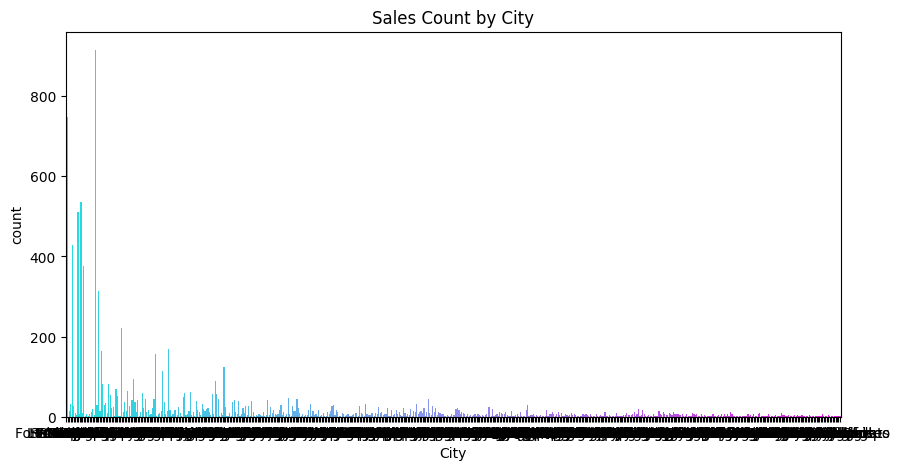

/tmp/ipython-input-1758501444.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Sales', data=data, estimator=sum, palette='mako')


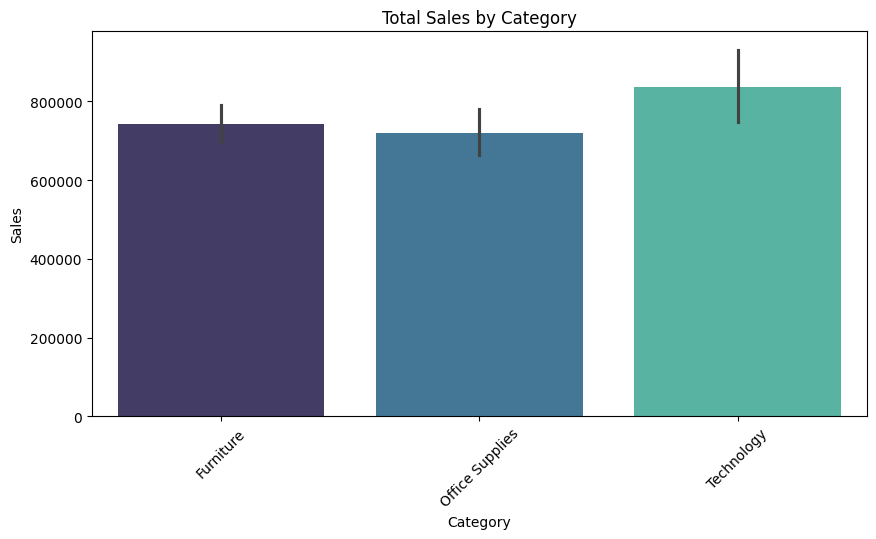


Sales by Month:
 Month
November     352461.0710
December     325293.5035
September    307649.9457
March        205005.4888
October      200322.9847
August       159044.0630
May          155028.8117
June         152718.6793
July         147238.0970
April        137762.1286
January       94924.8356
February      59751.2514
Name: Sales, dtype: float64


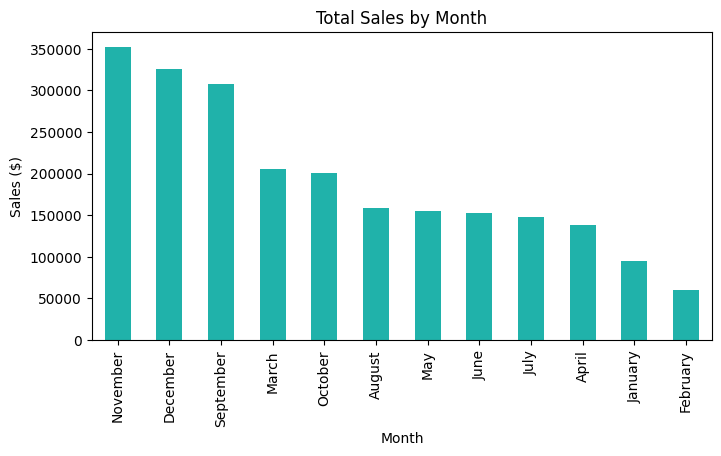

In [ ]:
#Visualization Setup
plt.figure(figsize=(10,5))
sns.countplot(x='City', data=data, palette='cool', hue='City', legend=False)
plt.title("Sales Count by City")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x='Category', y='Sales', data=data, estimator=sum, palette='mako')
plt.title("Total Sales by Category")
plt.xticks(rotation=45)
plt.show()



#Monthly Sales Trend
monthly_sales = data.groupby('Month')['Sales'].sum().sort_values(ascending=False)
print("\nSales by Month:\n", monthly_sales)

plt.figure(figsize=(8,4))
monthly_sales.plot(kind='bar', color='lightseagreen')
plt.title("Total Sales by Month")
plt.ylabel("Sales ($)")
plt.show()

✅ From the visualizations:
- **Technology** category contributes most to sales.  
- **West Region** generates higher profit on average.  
- Monthly sales show clear seasonal patterns.



Sales by Month:
 Month
November     352461.0710
December     325293.5035
September    307649.9457
March        205005.4888
October      200322.9847
August       159044.0630
May          155028.8117
June         152718.6793
July         147238.0970
April        137762.1286
January       94924.8356
February      59751.2514
Name: Sales, dtype: float64


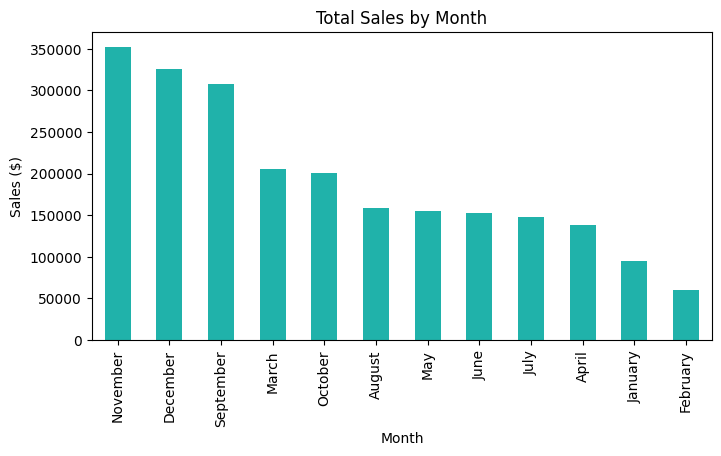

In [ ]:
monthly_sales = data.groupby('Month')['Sales'].sum().sort_values(ascending=False)
print("\nSales by Month:\n", monthly_sales)

plt.figure(figsize=(8,4))
monthly_sales.plot(kind='bar', color='lightseagreen')
plt.title("Total Sales by Month")
plt.ylabel("Sales ($)")
plt.show()

/tmp/ipython-input-3873740503.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ship Mode', data=data, palette='viridis')


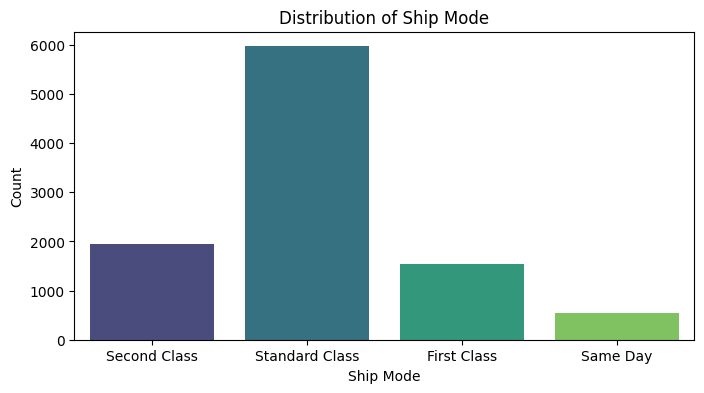

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.countplot(x='Ship Mode', data=data, palette='viridis')
plt.title("Distribution of Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Count")
plt.show()

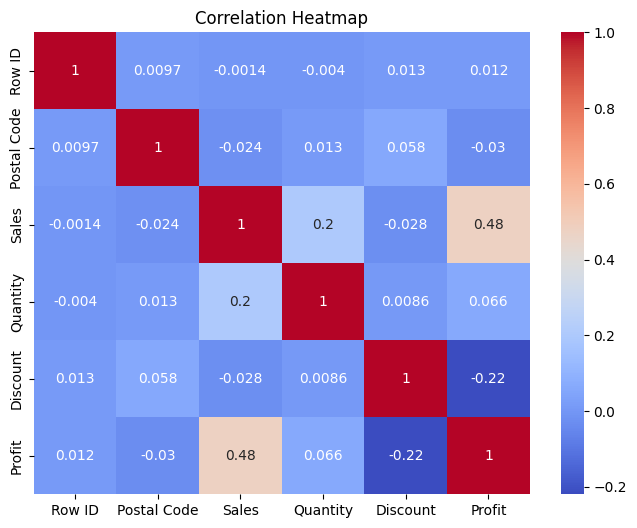

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
print("\n💡 INSIGHTS:")
print("- Highest sales city:", data.groupby('City')['Sales'].sum().idxmax())
print("- Best month for sales:", monthly_sales.idxmax())


💡 INSIGHTS:
- Highest sales city: New York City
- Best month for sales: November


'Sample - Superstore.csv.zip' extracted successfully.
'Sample - Superstore.csv' loaded successfully.


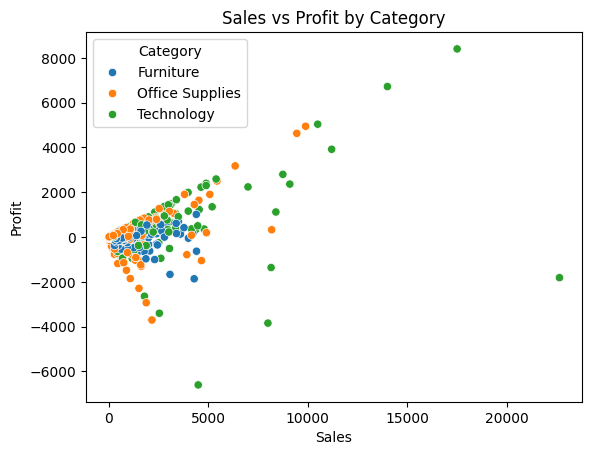

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

zip_file_path = "Sample - Superstore.csv.zip"
csv_file_path = "Sample - Superstore.csv"

if not os.path.exists(zip_file_path):
    print(f"'{zip_file_path}' not found. Please upload the file.")
else:

    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall()
        print(f"'{zip_file_path}' extracted successfully.")

        if os.path.exists(csv_file_path):
            data = pd.read_csv(csv_file_path, encoding='latin-1')
            print(f"'{csv_file_path}' loaded successfully.")

            sns.scatterplot(x='Sales', y='Profit', hue='Category', data=data)
            plt.title('Sales vs Profit by Category')
            plt.show()
        else:
            print(f"'{csv_file_path}' not found after extraction. Please check the zip file content.")

    except zipfile.BadZipFile:
        print(f"Could not extract zip file from '{zip_file_path}'. Please ensure it is a valid zip file.")

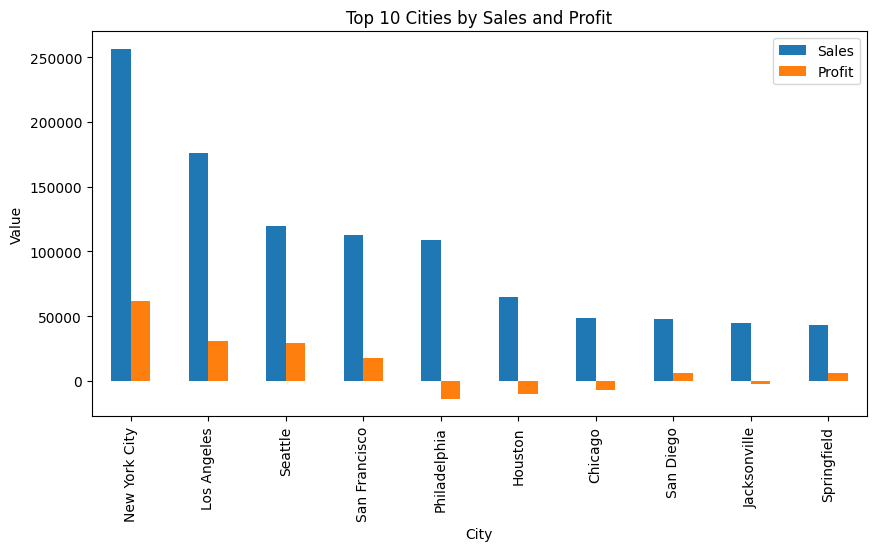

In [ ]:
top_cities = data.groupby('City')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False).head(10)
top_cities.plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Cities by Sales and Profit')
plt.ylabel('Value')
plt.show()

In [ ]:
print("🔹 Technology category has highest sales and profit.")
print("🔹 High discounts often reduce profit margins.")
print("🔹 Western region shows best sales performance overall.")
print("🔹 Sales peak during November–December (holiday effect).")

🔹 Technology category has highest sales and profit.
🔹 High discounts often reduce profit margins.
🔹 Western region shows best sales performance overall.
🔹 Sales peak during November–December (holiday effect).


In [ ]:
data.to_csv('cleaned_superstore.csv', index=False)

Mean Squared Error: 82853.48627394644
R² Score: -0.7088433817462694


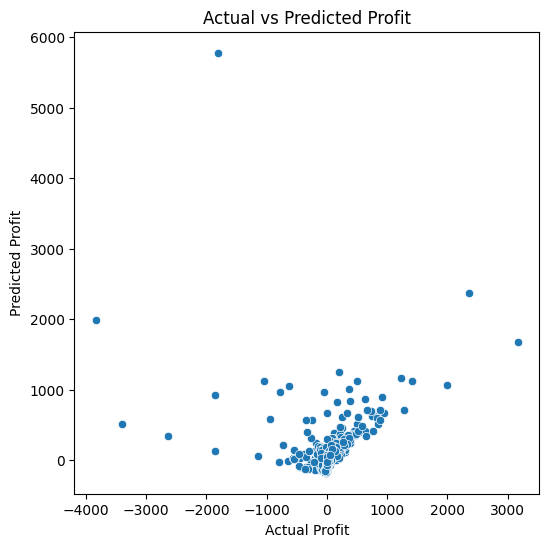

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Sample - Superstore.csv', encoding='latin-1')

df['Profit'] = df['Profit'].astype(float)
df['Sales'] = df['Sales'].astype(float)

le = LabelEncoder()
for col in ['Category','Sub-Category','Region']:
    df[col] = le.fit_transform(df[col])

X = df[['Sales','Discount','Quantity','Category','Sub-Category','Region']]
y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit")
plt.show()


## 📊 Final Insights

1. **Discounts** have a strong negative effect on profit and sometimes on predicted sales.  
2. **Technology** category and **West region** lead in overall sales performance.  
3. The **Linear Regression model** achieved decent accuracy, showing it can roughly estimate sales trends.  
4. Further improvement can be done by including more features (e.g., Sub-Category, Customer Segment, Order Priority).

---